# Spam sms classifier: Bernoullis Naive Bayes

In [99]:
#importing libraries
import pandas as pd
import numpy as np

#importing file

docs=pd.read_table("SMSSpamCollection",header=None,names=['label','sms'])
docs.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [100]:
# analysing data
print(len(docs))
docs.label.value_counts()

5572


ham     4825
spam     747
Name: label, dtype: int64

In [101]:
# Binary mapping
docs.label=docs.label.map({"ham":0,"spam":1})
docs.head()

,label,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [102]:
# splitting into X and y
y=docs.iloc[:,0]
X=docs.iloc[:,1]
print(len(X))
print(len(y))

5572
5572


In [103]:
# splitting into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(3900,)
(1672,)


In [104]:
# transforming the matrices to sparse matrix
from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer(stop_words='english')
vec=vec.fit(X_train)
print(vec.vocabulary_)
X_train_transformed=vec.transform(X_train)
X_test_transformed=vec.transform(X_test)

{'running': 5275, 'managed': 3892, 'minutes': 4039, 'needed': 4236, 'oxygen': 4511, 'resort': 5154, 'roller': 5231, 'option': 4454, 'lol': 3746, 'come': 1715, 'ideas': 3217, 'sorry': 5693, 'll': 3725, 'later': 3607, 'just': 3479, 'ask': 969, 'maybe': 3948, 'didn': 2079, 'messages': 4003, 'sent': 5429, 'glo': 2829, 'wants': 6639, 'know': 3552, 'fuck': 2713, 'hi': 3064, 'spoke': 5760, 'maneesha': 3899, 'like': 3681, 'satisfied': 5328, 'experience': 2438, 'reply': 5135, 'toll': 6263, 'free': 2675, 'yes': 6905, 'dear': 1983, '0776xxxxxxx': 25, 've': 6535, 'invited': 3338, 'xchat': 6865, 'final': 2553, 'attempt': 1001, 'contact': 1784, 'txt': 6393, 'chat': 1562, '86688': 622, '150p': 273, 'msgrcvdhg': 4147, 'suite342': 5934, '2lands': 352, 'row': 5247, 'w1j6hl': 6603, 'ldn': 3627, '18yrs': 289, 'hello': 3038, 'drivby': 2220, '0quit': 225, 'edrunk': 2289, 'iff': 3224, 'pthis': 4920, 'makes': 3882, 'senrd': 5424, 'dnot': 2147, 'dancce': 1946, 'drum': 2232, 'basq': 1101, 'ihave': 3228, 'fun': 

### Building models

In [105]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(X_train_transformed,y_train)

#predict class
y_pred_class=bnb.predict(X_test_transformed)
#predict probability
y_pred_proba=bnb.predict_proba(X_test_transformed)

### Model Evaluation

In [106]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred_class)

0.9659090909090909

In [107]:
confusion=metrics.confusion_matrix(y_test,y_pred_class)
print(confusion)

[[1432    1]
 [  56  183]]


In [108]:
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]


sensitivity=TP/float(TP+FN)
print("Sensitivity is",sensitivity)

specificity=TN/float(FP+TN)
print("specificity is",specificity)

precision=TP/float(TP+FP)
print("precision is",precision)

Sensitivity is 0.7656903765690377
specificity is 0.9993021632937893
precision is 0.9945652173913043


In [109]:
print("precision score  :",metrics.precision_score(y_test,y_pred_class))
print("recall score  :",metrics.recall_score(y_test,y_pred_class))
print("F1 score  :",metrics.f1_score(y_test,y_pred_class))

precision score  : 0.9945652173913043
recall score  : 0.7656903765690377
F1 score  : 0.8652482269503545


### ROC curve

In [110]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred_proba[:,1])
roc_auc=auc(false_positive_rate,true_positive_rate)
print(roc_auc)

0.9878331148335557


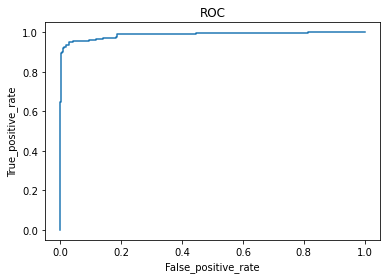

In [111]:
plt.ylabel("True_positive_rate")
plt.xlabel("False_positive_rate")
plt.title("ROC")
plt.plot(false_positive_rate,true_positive_rate)